In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

import scipy.stats
import pandas as pd
import re
import numpy as np

# figures
import seaborn as sns

In [2]:
df_raw1 = pd.read_csv('2018-02-28.csv')
df_raw2 = pd.read_csv('2018-03-01.csv')
df_raw1 = df_raw1.loc[~df_raw1['Dst Port'].str.startswith('Dst Port', na=False)]
df_raw2 = df_raw2.loc[~df_raw2['Dst Port'].str.startswith('Dst Port', na=False)]




C:\Users\i514670\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw = pd.concat([df_raw1, df_raw2])
df_raw1 = 0
df_raw2 = 0


## Dataset Exploration

In [4]:
df_raw.shape

(944171, 80)

In [5]:
df_raw

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0,0,0,0,0,0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0,0,0,0,0,0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
5,443,6,28/02/2018 08:22:20,164387,9,7,553,3773,202,0,...,20,0,0,0,0,0,0,0,0,Benign
6,49688,6,28/02/2018 08:22:21,0,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
7,445,6,28/02/2018 08:22:25,131411,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
8,445,6,28/02/2018 08:22:34,279349,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
9,443,6,28/02/2018 08:22:23,20771523,6,8,708,3695,387,0,...,20,222656,0,222656,222656,2.05489e+07,0,20548866,20548866,Benign


In [6]:
df_raw.isnull().sum().sum()

5875

In [7]:
df_raw.groupby('Label').size()

Label
Benign           782237
Infilteration    161934
dtype: int64

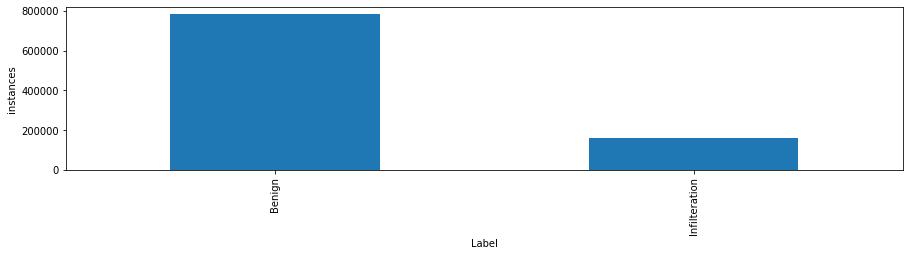

In [8]:
df_raw.shape
pl2 = df_raw.groupby('Label').size().plot(kind='bar', figsize=(15,3))
pl2.set_xlabel("Label")
pl2.set_ylabel("instances")
pl2

## Preprocessing

In [9]:
df_raw = df_raw.apply(pd.to_numeric, errors='ignore')

In [10]:
df_learn = df_raw

In [11]:
dtype=dtype={'Dst Port': float, 'Protocol': float, 'Timestamp': str, 'Flow Duration': float, 'Tot Fwd Pkts': float, 'Tot Bwd Pkts': float, 'TotLen Fwd Pkts': float, 'TotLen Bwd Pkts': float, 'Fwd Pkt Len Max': float, 'Fwd Pkt Len Min': float, 'Fwd Pkt Len Mean': float, 'Fwd Pkt Len Std': float, 'Bwd Pkt Len Max': float, 'Bwd Pkt Len Min': float, 'Bwd Pkt Len Mean': float, 'Bwd Pkt Len Std': float, 'Flow Byts/s': float, 'Flow Pkts/s': float, 'Flow IAT Mean': float, 'Flow IAT Std': float, 'Flow IAT Max': float, 'Flow IAT Min': float, 'Fwd IAT Tot': float, 'Fwd IAT Mean': float, 'Fwd IAT Std': float, 'Fwd IAT Max': float, 'Fwd IAT Min': float, 'Bwd IAT Tot': float, 'Bwd IAT Mean': float, 'Bwd IAT Std': float, 'Bwd IAT Max': float, 'Bwd IAT Min': float, 'Fwd PSH Flags': float, 'Bwd PSH Flags': float, 'Fwd URG Flags': float, 'Bwd URG Flags': float, 'Fwd Header Len': float, 'Bwd Header Len': float, 'Fwd Pkts/s': float, 'Bwd Pkts/s': float, 'Pkt Len Min': float, 'Pkt Len Max': float, 'Pkt Len Mean': float, 'Pkt Len Std': float, 'Pkt Len Var': float, 'FIN Flag Cnt': float, 'SYN Flag Cnt': float, 'RST Flag Cnt': float, 'PSH Flag Cnt': float, 'ACK Flag Cnt': float, 'URG Flag Cnt': float, 'CWE Flag Count': float, 'ECE Flag Cnt': float, 'Down/Up Ratio': float, 'Pkt Size Avg': float, 'Fwd Seg Size Avg': float, 'Bwd Seg Size Avg': float, 'Fwd Byts/b Avg': float, 'Fwd Pkts/b Avg': float, 'Fwd Blk Rate Avg': float, 'Bwd Byts/b Avg': float, 'Bwd Pkts/b Avg': float, 'Bwd Blk Rate Avg': float, 'Subflow Fwd Pkts': float, 'Subflow Fwd Byts': float, 'Subflow Bwd Pkts': float, 'Subflow Bwd Byts': float, 'Init Fwd Win Byts': float, 'Init Bwd Win Byts': float, 'Fwd Act Data Pkts': float, 'Fwd Seg Size Min': float, 'Active Mean': float, 'Active Std': float, 'Active Max': float, 'Active Min': float, 'Idle Mean': float, 'Idle Std': float, 'Idle Max': float, 'Idle Min': float, 'Label': str}
#df_learn = pd.read_csv('data.csv',dtype=dtype, na_values='Infinity')
#df_learn = DataFrame(df_raw, dtype=dtype, na_values='Infinity')
df_learn = df_raw

In [12]:
features = ["Dst Port", "Protocol", "Timestamp", "Tot Fwd Pkts", "Pkt Len Var", 'Subflow Fwd Pkts']
for f in features:
    print(df_learn[f].min(), df_learn[f].max())

0 65535
0 17
01/03/2018 01:00:00 28/02/2018 12:59:59
1 121309
0.0 519000000.0
1 121309


In [13]:
print(df_learn["Protocol"].unique())
print(len(df_learn["Dst Port"].unique()))

[ 6  0 17]
20969


In [14]:
df_learn.shape

(944171, 80)

In [15]:
df_learn = df_learn.drop(['Timestamp'], axis=1)

In [16]:
df_learn = df_learn.replace([np.inf, -np.inf, "NaN", "Infinity"], np.nan)
df_learn = df_learn.dropna() 

In [17]:
df_learn.shape

(935083, 79)

In [18]:
le = preprocessing.LabelEncoder()

df_learn['Label'] = le.fit_transform(df_learn['Label'])

df_learn

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,94658,6,7,708,3718,387,0,118.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
1,443,6,206,2,0,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
2,445,6,165505,3,1,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
3,443,6,102429,6,7,708,3718,387,0,118.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
4,443,6,167,2,0,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
5,443,6,164387,9,7,553,3773,202,0,61.444444,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
7,445,6,131411,3,1,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
8,445,6,279349,3,1,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0
9,443,6,20771523,6,8,708,3695,387,0,118.000000,...,20,2.226560e+05,0.000000e+00,222656,222656,2.054887e+07,0.000000e+00,20548866,20548866,0
10,443,6,201,2,0,0,0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0,0,0


In [19]:
def split_test_train_data(df_data):
    X = df_data.drop(["Label"], axis=1)
    y = df_data["Label"]
    return (X,y)

In [20]:
def encode(df_prep, one_hot_encoding_columns=[]):
    df_encoded = df_prep
    le = preprocessing.LabelEncoder()
    df_encoded = pd.get_dummies(df_encoded, columns=one_hot_encoding_columns)
    return df_encoded

In [21]:
def preprocess(df_prep,standardization_method=None):
    if df_prep.columns[-1] == "Label":
        standardization_columns = df_prep.columns[:-1] # cut last class column
    else:
        standardization_columns = df_prep.columns
    if standardization_method == "normal":
        std_scale = preprocessing.StandardScaler().fit(df_prep[standardization_columns])
        tr_cols = std_scale.transform(df_prep[standardization_columns])
        df_prep = df_prep.drop(standardization_columns, axis=1)
        df_tmp = pd.DataFrame(tr_cols, columns = standardization_columns)
        df_prep = pd.concat([df_prep.reset_index(), df_tmp], axis=1)
        df_prep = df_prep.drop("index", axis=1)
    if standardization_method == "minmax":
        minmax_scale = preprocessing.MinMaxScaler().fit(df_prep[standardization_columns])
        tr_cols = minmax_scale.transform(df_prep[standardization_columns])
        df_prep = df_prep.drop(standardization_columns, axis=1)
        df_tmp = pd.DataFrame(tr_cols, columns = standardization_columns)
        df_prep = pd.concat([df_prep.reset_index(), df_tmp], axis=1)
        df_prep = df_prep.drop("index", axis=1)
    return df_prep

## Training

In [22]:
def train(cl,X,y, test_size=0.2):
    if test_size == 0:
        model = cl.fit(X, y)
        return model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model = cl.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = model.score(X_test, y_test)
    print(scores)
    return model

In [23]:
def test(model, X_test, y_test):
    y_pred = model.predict(X_test)
    scores = model.score(X_test, y_test)
    print(scores)

## Evaluation

In [24]:
def score(model, X, y, cv=10):
    scoring = ['accuracy', 'balanced_accuracy', 'f1_macro', 'f1_weighted', 'precision', 'recall','f1']
    scores = cross_validate(model, X, y.values.ravel(), cv=cv, scoring=scoring)
    scores_avg = zip(["time_fit","time_score","accuracy","bal_acc","f1_macro","f1_weigh", 'precision', 'recall','f1'],map(lambda key: np.average(scores[key]), scores.keys()))
    scores_avg = dict(scores_avg)
    scores_avg["accuracy_std"]=scores["test_accuracy"].std()
    return scores_avg

In [25]:
def scoreModels(cfs, cfs_name, X, y):
    columns = ['Classifier', 'time_fit', 'time_score', 'accuracy', 'bal_acc', 'f1_macro', 'f1_weigh', 'accuracy_std','precision', 'recall', 'f1']
    scores_results = pd.DataFrame([],columns=columns)
    for i, model in enumerate(cfs):
        scores = score(model,X, y)
        print(scores)
        single_result = pd.DataFrame([(cfs_name[i], scores['time_fit'], scores['time_score'], scores['accuracy'], scores['bal_acc'], scores['f1_macro'], scores['f1_weigh'], scores['accuracy_std'], scores['precision'], scores['recall'], scores['f1'])], columns=columns)
        scores_results = scores_results.append(single_result)
    return scores_results

## Experimentation

In [26]:
%&/() # syntax error

UsageError: Line magic function `%&/()` not found.


In [ ]:
# Exp1: Model selection
np.random.seed(1)

import random
random.seed(1)

cfs = [
    neighbors.KNeighborsClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    Perceptron(),
    svm.LinearSVC(),
    svm.SVC(),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(),
    GradientBoostingClassifier(),
    HistGradientBoostingClassifier()
]

cfs_name = [
    '5-NN',
    'Decision Tree',
    'Random Forest',
    'Gaussian Naive Bayes',
    'Perceptron',
    'Linear SVC',
    'SVC',
    'AdaBoost',
    'QDA',
    'SGDClassifier',
    'GradientBoostingClassifier',
    'HistGradientBoostingClassifier'
]

df_prep = preprocess(df_learn, standardization_method="minmax")
df_prep = encode(df_prep, one_hot_encoding_columns=["Protocol"])

X, y = split_test_train_data(df_prep.sample(10000))

scoreModels(cfs, cfs_name, X, y)

In [ ]:
# Exp2: SMOTE
np.random.seed(1)

import imblearn
from imblearn.over_sampling import SMOTE

#df_prep = preprocess(df_learn, standardization_method="minmax")
#df_prep = encode(df_prep, one_hot_encoding_columns=["Protocol"])

X, y = split_test_train_data(df_prep.sample(30000))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# oversample minority dataset
oversample = SMOTE()
X_train_o, y_train_o = oversample.fit_resample(X_train, y_train)

cfs = ensemble.HistGradientBoostingClassifier()
model = train(cfs, X_o, y_o, test_size = 0)

test(model, X_test, y_test)

#cfs = svm.LinearSVC()
#train(cfs, X_o, y_o)


In [41]:
935083/10

93508.3

In [39]:
# Exp 4
np.random.seed(100)

df_prep = preprocess(df_learn, standardization_method="minmax")
df_prep = encode(df_prep, one_hot_encoding_columns=["Protocol"])

X, y = split_test_train_data(df_prep.sample(frac=1))

cfs = ensemble.HistGradientBoostingClassifier()
score(cfs, X, y)

{'time_fit': 26.83479232788086,
 'time_score': 0.4869204521179199,
 'accuracy': 0.8324041803336966,
 'bal_acc': 0.5152671472729426,
 'f1_macro': 0.4848617853685656,
 'f1_weigh': 0.7626062605489385,
 'precision': 0.8132570579385512,
 'recall': 0.032134150551501275,
 'f1': 0.061740210553940064,
 'accuracy_std': 0.0004175675572004962}

In [46]:
X

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_0.0,Protocol_0.3529411764705882,Protocol_1.0
679295,0.775341,2.333334e-07,0.000000,0.000019,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
456148,0.000809,3.164917e-04,0.000008,0.000038,5.263455e-07,4.295943e-06,0.003791,0.026027,0.012896,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1
630606,0.006790,9.664334e-04,0.000016,0.000019,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
923573,0.931975,1.500000e-07,0.000008,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
885996,0.103593,8.333334e-09,0.000000,0.000019,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
314287,0.000809,4.679584e-04,0.000008,0.000038,5.124943e-07,8.066826e-06,0.003691,0.025342,0.012557,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1
823651,0.000809,2.191667e-06,0.000000,0.000019,3.116519e-07,1.455847e-06,0.004489,0.030822,0.015271,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1
605381,0.000198,8.333334e-09,0.000000,0.000019,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0
424252,0.006760,6.615819e-02,0.000091,0.000244,1.237605e-05,9.928401e-05,0.121309,0.000000,0.050537,0.104219,...,0.000000,0.006353,0.006353,0.060121,0.000000,0.060121,0.060121,0,1,0
602940,0.055833,8.333334e-09,0.000000,0.000019,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0


In [51]:
np.random.seed(100)
X, y = split_test_train_data(df_prep)
cfs = svm.LinearSVC()
score(cfs, X, y)

C:\Users\i514670\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'time_fit': 146.66062395572663,
 'time_score': 0.21460449695587158,
 'accuracy': 0.825759860110114,
 'bal_acc': 0.49960943772220395,
 'f1_macro': 0.4547568653630236,
 'f1_weigh': 0.7499795106284922,
 'precision': 0.02867232875113096,
 'recall': 0.0027452689243027883,
 'f1': 0.005008701576564039,
 'accuracy_std': 0.004958642769965372}

In [35]:
# Exp 5 Confusion matrix

from sklearn.metrics import confusion_matrix

#df_prep = preprocess(df_learn, standardization_method="minmax")
#df_prep = encode(df_prep, one_hot_encoding_columns=["Protocol"])

X, y = split_test_train_data(df_prep.sample(10000))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
cfs = ensemble.HistGradientBoostingClassifier()
model = train(cfs, X_train, y_train, test_size = 0)

y_pred = cfs.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1614,   19],
       [ 352,   15]], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print((tn, fp, fn, tp))
recall = tp / (tp + tn)
print("recall ", recall)
precision = tp / (tp + fn)
print("precision ", precision)

(1642, 19, 332, 7)
recall  0.004244996967859308
precision  0.02064896755162242


In [47]:
np.random.seed(1)
X, y = split_test_train_data(df_prep.sample(frac=1))
cfs = ensemble.RandomForestClassifier(n_estimators=100)
model = train(cfs, X, y)

0.8072528165888663


In [49]:
model.feature_importances_

array([6.34504193e-02, 5.32167755e-02, 4.33379631e-03, 3.30568211e-03,
       3.35008924e-03, 5.90914731e-03, 9.70198334e-03, 3.34236121e-03,
       1.08024324e-02, 7.09125418e-03, 5.91236004e-03, 3.89876857e-03,
       9.61675570e-03, 6.39295623e-03, 2.35834570e-02, 3.74657162e-02,
       4.52480908e-02, 3.48305788e-02, 4.80448436e-02, 2.60039462e-02,
       3.51281405e-02, 3.38002598e-02, 2.75996371e-02, 3.48691326e-02,
       2.51579654e-02, 2.75729039e-02, 2.48012149e-02, 2.20549204e-02,
       2.52692760e-02, 1.92731534e-02, 3.27188286e-04, 0.00000000e+00,
       5.11269544e-04, 0.00000000e+00, 5.94630344e-03, 4.75114456e-03,
       3.55999915e-02, 3.44063510e-02, 3.27719827e-03, 6.86377992e-03,
       1.35791924e-02, 1.17501119e-02, 9.06158680e-03, 9.25559863e-05,
       2.83091154e-04, 1.04054307e-03, 4.71561894e-03, 2.50107867e-03,
       6.27218624e-04, 6.11024821e-04, 9.76760763e-04, 1.83067389e-03,
       1.33533137e-02, 1.13090943e-02, 9.35789385e-03, 0.00000000e+00,
      